In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url="https://www.worldometers.info/world-population/population-by-country/"
r=requests.get(url)
soup=BeautifulSoup(r.content)
table=soup.find("table",{"id":"example2"})


In [3]:
headers=[head.text for head in table.find_all("th")]
headers


['#',
 'Country (or dependency)',
 'Population (2024)',
 'Yearly Change',
 'Net Change',
 'Density (P/Km²)',
 'Land Area (Km²)',
 'Migrants (net)',
 'Fert. Rate',
 'Med. Age',
 'Urban Pop %',
 'World Share']

In [4]:
pop_data=[]
rows=table.tbody.find_all("tr")
for row in rows:
    row_data=[]
    for td in row.find_all("td"):
        row_data.append(td.text.strip())
    pop_data.append(row_data)
pop_data[:1]    

[['1',
  'India',
  '1,450,935,791',
  '0.89 %',
  '12,866,195',
  '488',
  '2,973,190',
  '-630,830',
  '2.0',
  '28',
  '37 %',
  '17.78 %']]

In [5]:
df=pd.DataFrame(pop_data,columns=headers).drop("#",axis=1)
df.rename(columns={"Country (or dependency)":"Country","Population (2024)":"Population_2024",
                  "Yearly Change":"Yearly_Change",
                  "Net Change":"Net_Change",
                  "Density (P/Km²)":"Density",
                  "Land Area (Km²)":"Land_Area",
                  "Migrants (net)":"Migrant_net",
                  "Fert. Rate":"Fert_Rate",
                  "Med. Age":"Median_Age",
                  "Urban Pop %":"Urban_Pop_Percent",
                  "World Share":"World_share"},inplace=True)
df.head()

,Country,Population_2024,Yearly_Change,Net_Change,Density,Land_Area,Migrant_net,Fert_Rate,Median_Age,Urban_Pop_Percent,World_share
0,India,"1,450,935,791",0.89 %,"12,866,195",488,"2,973,190","-630,830",2.0,28,37 %,17.78 %
1,China,"1,419,321,278",-0.23 %,"-3,263,655",151,"9,388,211","-318,992",1.0,40,66 %,17.39 %
2,United States,"345,426,571",0.57 %,"1,949,236",38,"9,147,420","1,286,132",1.6,38,82 %,4.23 %
3,Indonesia,"283,487,931",0.82 %,"2,297,864",156,"1,811,570","-38,469",2.1,30,59 %,3.47 %
4,Pakistan,"251,269,164",1.52 %,"3,764,669",326,"770,880","-1,401,173",3.5,20,34 %,3.08 %


In [6]:
for col in df.columns[1:]:
    df[col]=df[col].str.replace(",","")
    df[col]=df[col].str.replace(" %","")
df.head()    


,Country,Population_2024,Yearly_Change,Net_Change,Density,Land_Area,Migrant_net,Fert_Rate,Median_Age,Urban_Pop_Percent,World_share
0,India,1450935791,0.89,12866195,488,2973190,-630830,2.0,28,37,17.78
1,China,1419321278,-0.23,-3263655,151,9388211,-318992,1.0,40,66,17.39
2,United States,345426571,0.57,1949236,38,9147420,1286132,1.6,38,82,4.23
3,Indonesia,283487931,0.82,2297864,156,1811570,-38469,2.1,30,59,3.47
4,Pakistan,251269164,1.52,3764669,326,770880,-1401173,3.5,20,34,3.08


In [7]:
#to see if any column has any strange values
for col in df.columns:
    print(f"The {col} column:")
    print(df[col].value_counts())
    print("--------------")

The Country column:
Country
India               1
China               1
United States       1
Indonesia           1
Pakistan            1
                   ..
Montserrat          1
Falkland Islands    1
Tokelau             1
Niue                1
Holy See            1
Name: count, Length: 234, dtype: int64
--------------
The Population_2024 column:
Population_2024
1450935791    1
1419321278    1
345426571     1
283487931     1
251269164     1
             ..
4389          1
3470          1
2506          1
1819          1
496           1
Name: count, Length: 234, dtype: int64
--------------
The Yearly_Change column:
Yearly_Change
0.00     4
0.57     3
0.63     3
1.41     3
0.99     3
        ..
-0.82    1
1.56     1
-1.73    1
-0.98    1
4.55     1
Name: count, Length: 182, dtype: int64
--------------
The Net_Change column:
Net_Change
12866195    1
-3263655    1
1949236     1
2297864     1
3764669     1
           ..
-31         1
-7          1
109         1
2           1
0           1

In [8]:
df[["Population_2024","Net_Change","Density","Land_Area","Migrant_net","Median_Age"]]=df[["Population_2024","Net_Change","Density","Land_Area","Migrant_net","Median_Age"]].astype("int")
df.dtypes


Country              object
Population_2024       int64
Yearly_Change        object
Net_Change            int64
Density               int64
Land_Area             int64
Migrant_net           int64
Fert_Rate            object
Median_Age            int64
Urban_Pop_Percent    object
World_share          object
dtype: object

In [9]:
#df[["Yearly_Change","Urban_Pop_Percent","World_share"]].astype("float")
df["Yearly_Change"]=df.Yearly_Change.astype("float")*0.01
df["World_share"]=df.World_share.astype("float")*0.01
df["Fert_Rate"]=df["Fert_Rate"].astype("float")
df["Urban_Pop_Percent"]=df.Urban_Pop_Percent.str.replace("N.A.","0").astype("float")
#for this columns, in order to convert it to float for calculation purposes, I replaced N.A, string with 0.
print(df.dtypes)
df.head()



Country               object
Population_2024        int64
Yearly_Change        float64
Net_Change             int64
Density                int64
Land_Area              int64
Migrant_net            int64
Fert_Rate            float64
Median_Age             int64
Urban_Pop_Percent    float64
World_share          float64
dtype: object


,Country,Population_2024,Yearly_Change,Net_Change,Density,Land_Area,Migrant_net,Fert_Rate,Median_Age,Urban_Pop_Percent,World_share
0,India,1450935791,0.0089,12866195,488,2973190,-630830,2.0,28,37.0,0.1778
1,China,1419321278,-0.0023,-3263655,151,9388211,-318992,1.0,40,66.0,0.1739
2,United States,345426571,0.0057,1949236,38,9147420,1286132,1.6,38,82.0,0.0423
3,Indonesia,283487931,0.0082,2297864,156,1811570,-38469,2.1,30,59.0,0.0347
4,Pakistan,251269164,0.0152,3764669,326,770880,-1401173,3.5,20,34.0,0.0308


In [10]:
import pycountry_convert as pc
def conversion(df):
    country_code=pc.country_name_to_country_alpha2(df.Country,cn_name_format="default")
    cont_code=pc.country_alpha2_to_continent_code(country_code)
    return cont_code

In [11]:
#to further clean up data to have the country name in the right form
df.loc[14,"Country"]="Democratic Republic of the Congo"
df.loc[88,"Country"]="Czech Republic"
df.loc[120,"Country"]="Palestine"


In [12]:
#df["code"]=df.apply(conversion,axis=1)
#df.head()

### Data is officially cleaned and ready to be analyzed.
### Question 1: what's the top 10 and bottom 10 population country?

In [13]:
a=df.sort_values(by="Population_2024",ascending=False).iloc[:10]
print(f"The top 10 country is {list(a.Country)}")

The top 10 country is ['India', 'China', 'United States', 'Indonesia', 'Pakistan', 'Nigeria', 'Brazil', 'Bangladesh', 'Russia', 'Ethiopia']


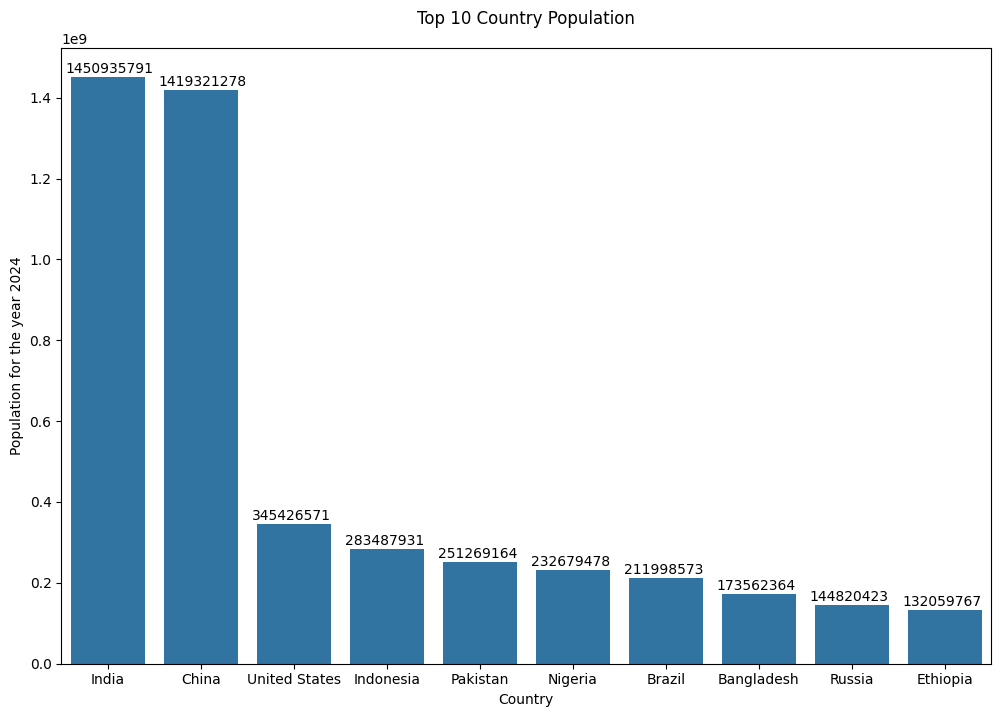

In [14]:
fig,ax=plt.subplots(figsize=(12,8))
sns.barplot(a,x="Country",y="Population_2024",ax=ax)
ax.set_title("Top 10 Country Population",y=1.025)
ax.set_ylabel("Population for the year 2024")
for i in range(len(a)):
    plt.text(i-0.45,a.loc[i,"Population_2024"]+10000000,a.loc[i,"Population_2024"])

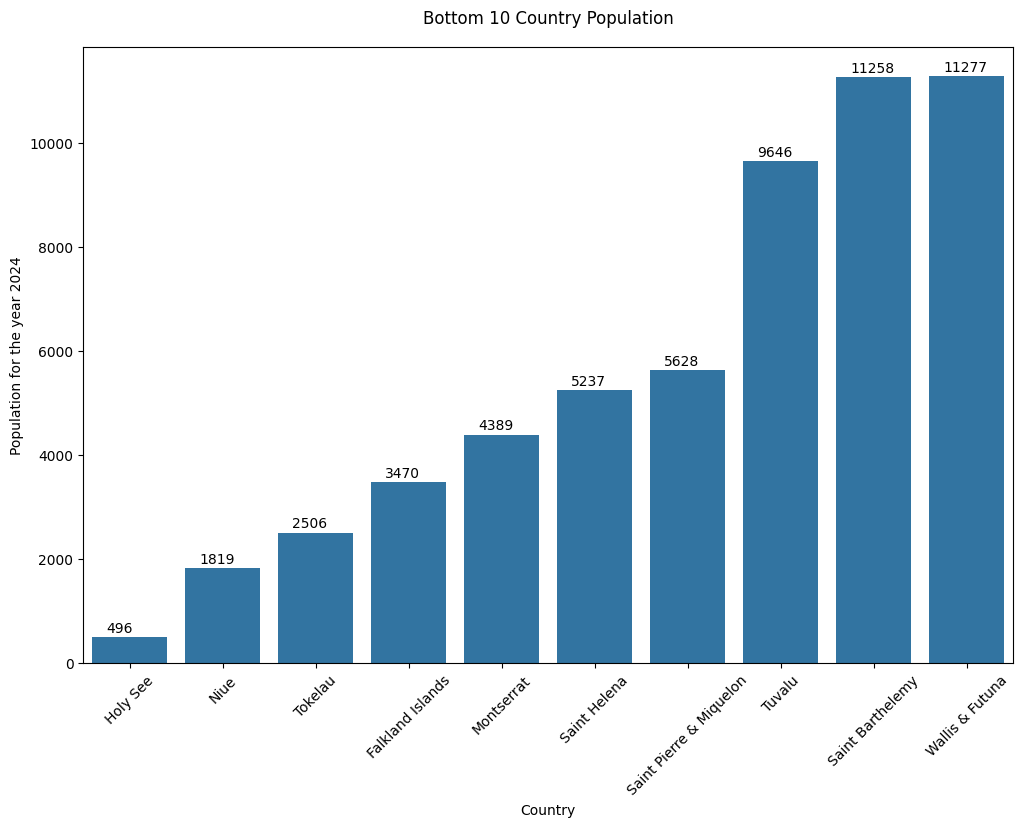

In [15]:
b=df.sort_values(by="Population_2024",ascending=True).iloc[:10]
fig,ax=plt.subplots(figsize=(12,8))
sns.barplot(b,x="Country",y="Population_2024",ax=ax)
ax.set_title("Bottom 10 Country Population",y=1.025)
ax.set_ylabel("Population for the year 2024")
for i in range(len(b)):
    plt.text(i-0.25,b.iloc[i,1]+100,b.iloc[i,1])
plt.xticks(rotation=45)
plt.show()

## Question 2. What's the relationship between the population and the density?

<Axes: xlabel='Density', ylabel='Population_2024'>

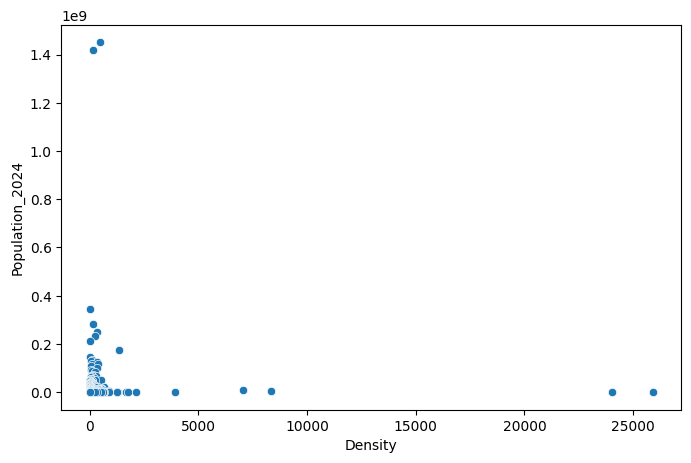

In [16]:
fig,ax=plt.subplots(figsize=(8,5))
sns.scatterplot(df,x="Density",y="Population_2024",ax=ax)

<Axes: xlabel='Land_Area', ylabel='Density'>

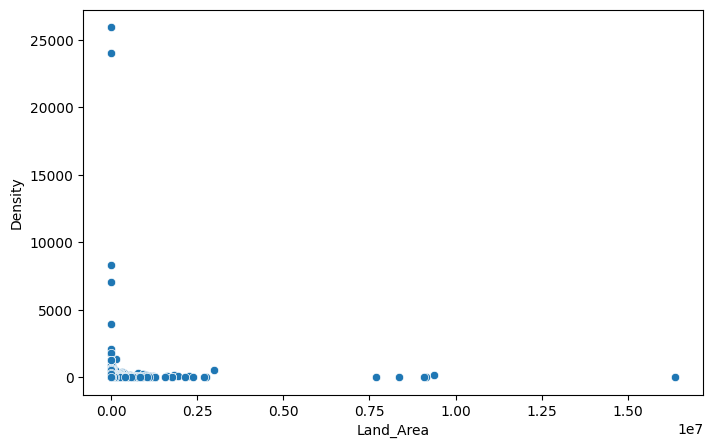

In [17]:
fig,ax=plt.subplots(figsize=(8,5))
sns.scatterplot(df,x="Land_Area",y="Density",ax=ax)

## The relationship with lowest median age and Fert Rate

Text(0.5, 1.0, 'The relationship between Median age and Fertality rate')

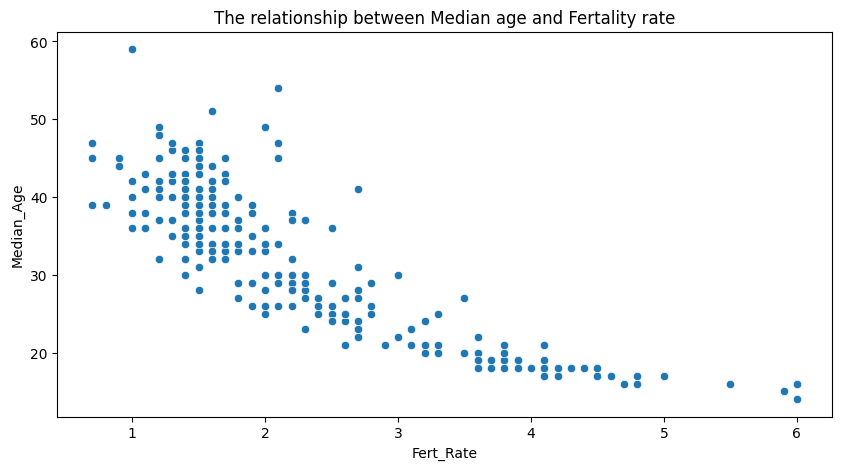

In [18]:
fig,ax=plt.subplots(figsize=(10,5))
sns.scatterplot(df,x="Fert_Rate",y="Median_Age",ax=ax)
ax.set_title("The relationship between Median age and Fertality rate")

## Question 4 what's the total population and land area percentage for top 10 and top 20 countries

In [19]:
#Top 10 population total percentage
(df.sort_values("Population_2024",ascending=False).iloc[:10].Population_2024.sum()/df.Population_2024.sum()).round(2)

np.float64(0.57)

In [20]:
#Top 10 population total percentage
(df.sort_values("Population_2024",ascending=False).iloc[:20].Population_2024.sum()/df.Population_2024.sum()).round(2)

np.float64(0.7)

In [21]:
df.columns

Index(['Country', 'Population_2024', 'Yearly_Change', 'Net_Change', 'Density',
       'Land_Area', 'Migrant_net', 'Fert_Rate', 'Median_Age',
       'Urban_Pop_Percent', 'World_share'],
      dtype='object')

In [22]:
(df.sort_values("Land_Area",ascending=False).iloc[:10].Land_Area.sum()/df.Land_Area.sum()).round(2)

np.float64(0.54)

In [23]:
(df.sort_values("Land_Area",ascending=False).iloc[:20].Land_Area.sum()/df.Land_Area.sum()).round(2)

np.float64(0.68)

## Question 5 The distribution of population and land areas

Text(0.5, 1.0, 'Distributionbn of the population')

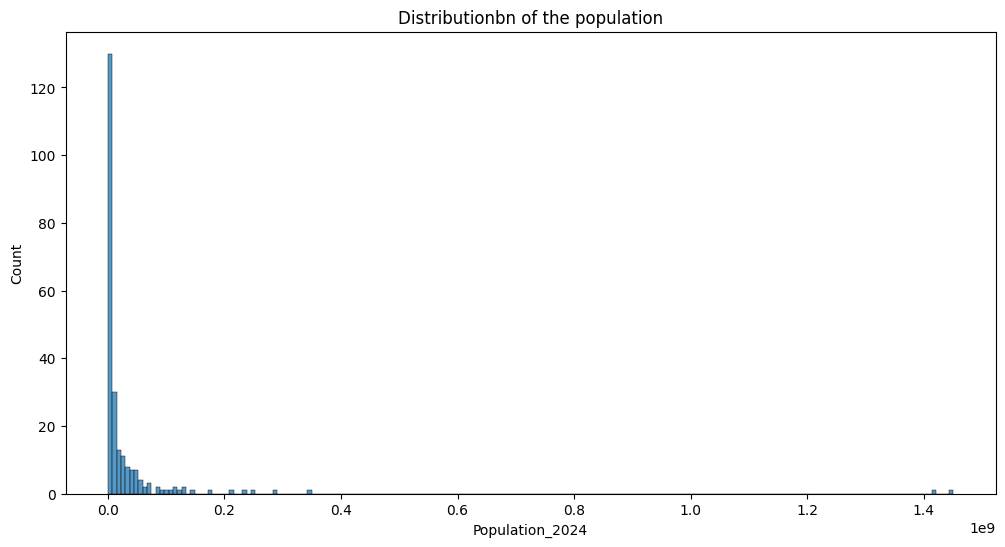

In [24]:
fig,ax=plt.subplots(figsize=(12,6))
sns.histplot(df.Population_2024,ax=ax)
ax.set_title("Distributionbn of the population")
#most of the population is under 200 million

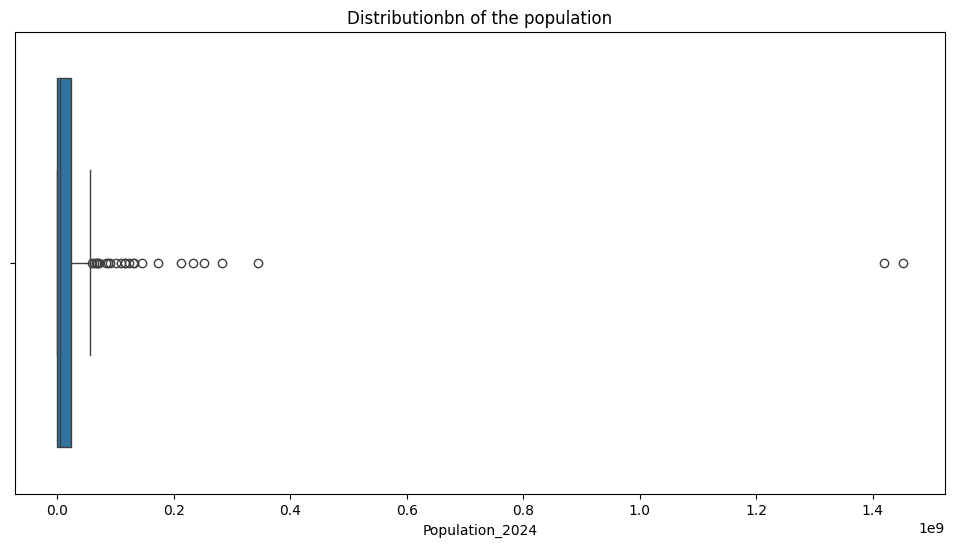

In [25]:
fig,ax=plt.subplots(figsize=(12,6))
sns.boxplot(x=df.Population_2024,ax=ax)
ax.set_title("Distributionbn of the population")
plt.show()
#most of the population is under 200 million

In [26]:
#Once again It has suggested that most countries have low population. 
#As the top whisker is not even 100 million. And many outliers above 100 million population

### Bonus. An interactive graph to show the top/bottom 10s of the metrics of the user's choice

In [27]:
from dash import Dash, html,dcc
from dash.dependencies import Output, Input
import plotly.express as px
app=Dash(__name__)
app.layout=html.Div([
    html.H2(id="top_10",style={"textAlign":"center"}),
    dcc.Dropdown(id="metrics",
                options=df.select_dtypes("number").columns,
                value="Population_2024"),
    dcc.RadioItems(id="ascending",
                  options=[{"label":"Bottom 10","value":True},
                          {"label":"Top 10","value":False}],
                  value=True),
    dcc.Graph("bars")
])
@app.callback(Output("top_10","children"),
              Output("bars","figure"),
              Input("metrics","value"),
              Input("ascending","value")
             )
def plot(metric,ascending):
    header=f"The top 10 or bottom 10 countries in {metric}"
    fig=px.bar(df.sort_values(by=metric,ascending=ascending).iloc[:10].sort_values(by=metric,ascending=False),
               x="Country",
               y=metric,
               
              text_auto='.2s')
    fig.update_traces(textposition="outside"),
    fig.update_layout(xaxis={"range":[-1,10]},height=500)
    return header,fig
if __name__=="__main__":
    app.run_server(mode="inline",debug=True)